In [5]:
# !pip install pysd
%pylab inline
import pysd
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [6]:
model = pysd.load('./model.py')

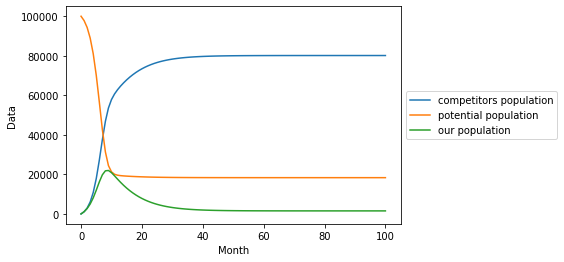

In [7]:
model.reload()
#for p first index is company: 1 - our, 2 - competitor. Second index is: satisfied - 1, neutral - 2, disappointed - 3.
values = model.run(
    params={
        #other params(rate, word of mouth efficiency, marketing_efficiency e.t.c) are written in model.py
        #default are:def sociability - 100, word_of_mouth_efficiency - 0.015, marketing_efficiency - 0.011,
        #our_clients_initial - 0, potential_clients_initial - 100000, competitor_clients_initial - 0,
        #p11 - 0.5, p13 - 0.5, p21 - 0.5, p23 - 0.5
        "p11": 0.45, "p13": 0.4, "p21": 0.6, "p23": 0.4
    },#choose only these columns
    return_columns=["competitors population", "potential population", "our population"])
values.plot()
plt.ylabel('Data')
plt.xlabel('Month')
plt.legend(loc='center left', bbox_to_anchor=(1,.5));

In [8]:
dataset = []
for i in range(100):#p11 and p21 are choosen from 0 to 1 using step=0.01, p13 and p23 are other remaining part of 1
    if i%10==0:
        print(i)#logging percents of calculations
    for j in range(100):
        p11 = i/100
        p13 = 1 - p11
        p21 = j/100
        p23 = 1 - p21
        final_time = 300
        model.reload()
        values = model.run(
            params={
                "p11": p11, "p13": p13, "p21": p21, "p23": p23, "time final": final_time
            },
            return_columns=["competitors population", "potential population", "our population"])
        #if last errors are small enough then sequence is convergent
        converge = True
        epsilon = 1
        for k in range(4, -1, -1):
            potential_population_error = abs(values["potential population"][final_time - 1 - k] - values["potential population"][final_time - k])
            competitors_population_error = abs(values["competitors population"][final_time - 1 - k] - values["competitors population"][final_time - k])
            our_population_error = abs(values["our population"][final_time - 1 - k] - values["our population"][final_time - k])
            if(potential_population_error > epsilon and
               competitors_population_error > epsilon and
               our_population_error > epsilon):
                converge = False
        #0.01 percent error out of all population(10000)
        if converge:
            #append to dataset only convergent sequences
            dataset.append({
                "p11": p11,
                "p13": p13,
                "p21": p21,
                "p23": p23,
                #all necessary values for ML model
                "potential_population": values["potential population"][final_time],#if it will be needed
                "competitors_population": values["competitors population"][final_time],#m2
                "our_population": values["our population"][final_time]#m1
            })
#check number of elements in dataset
len(dataset)#10000 elements out of 20000

0
10
20
30
40
50
60
70
80
90


10000

In [11]:
dataset[50]#example of data for training\testing model

{'competitors_population': 72019.96309446596,
 'our_population': 501.38494590231585,
 'p11': 0.0,
 'p13': 1.0,
 'p21': 0.5,
 'p23': 0.5,
 'potential_population': 27478.65195963176}